## Importing Libraries

In [23]:
import plotly.offline as plt
import pandas as pd
import matplotlib.pyplot as matplot
import plotly.graph_objs as go

In [24]:
df_main = pd.read_csv("Dataset\German_Credit_Data_With_Target.csv", index_col = 0)

In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving_accounts     817 non-null object
Checking_account    606 non-null object
Credit_amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
df_main.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving_accounts       4
Checking_account      3
Credit_amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [5]:
df_main.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Plotting with MatplotLib

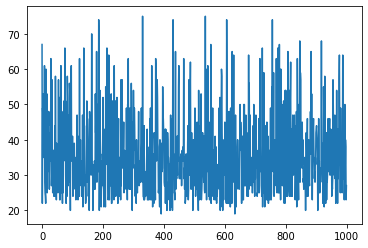

In [164]:
matplot.plot(df_main.Age)
matplot.show()

# Plotting with Plotly 

### Looping over Multiple Features - Plotly

In [26]:
plt.plot([{
    'x' : df_main.index ,
    'y' : df_main.columns
        }])

'temp-plot.html'

In [30]:
#Graph does not makes sense, aggregate the values by Housing type and then it will show statistics.
# index - Group by Column name.

Agg_val = pd.pivot_table(df_main, index = 'Housing')
# ----- OUTPUT : Agg_val -------

#             Age  Credit_amount   Duration       Job
# Housing                                               
# free     43.814815    4906.212963  27.453704  2.157407
# own      35.593268    3060.939691  20.328191  1.879383
# rent     30.368715    3122.553073  19.240223  1.849162

plt.plot([{
    'x' : Agg_val.index,
    'y' : Agg_val.Credit_amount
}]
    
# Cannot see all values in single Graph due to scaling of Y axis, Credit_amount value are very high.
plt.plot([{
    'x' : Agg_val.index,
    'y' : Agg_val[colname]
}
    for colname in Agg_val.columns
])

               Age  Credit_amount   Duration       Job
Housing                                               
free     43.814815    4906.212963  27.453704  2.157407
own      35.593268    3060.939691  20.328191  1.879383
rent     30.368715    3122.553073  19.240223  1.849162


In [34]:
df_sub = df_main[['Age', 'Duration', 'Job']]

plt.plot([
    {
    'x' : df_sub.index ,
    'y' : df_sub[col],
    'name' : col
    }
for col in df_sub.columns])

'temp-plot.html'

 ### Plotting usign Plotly - Graph objs

In [57]:
df_sub_Age = (pd.pivot_table(df_main, index = 'Age', values = 'Credit_amount'))
df_sub_Age = df_sub_Age.round()

# Plotting Graph with Average Credit Amt by age
plt.plot([
        go.Scatter(
        x = df_sub_Age.index,
        y = df_sub_Age.Credit_amount,
        mode = 'markers+lines')])

'temp-plot.html'

In [58]:
# OR --

data = [        go.Scatter(
        x = df_sub_Age.index,
        y = df_sub_Age.Credit_amount,
        mode = 'markers+lines')]

plt.plot(data)

'temp-plot.html'

### Adding Layout to Graph

In [59]:
layout = go.Layout(
    title = 'Age v/s Credit Amt',
    xaxis = dict(title = 'Age in Years'),
    yaxis = dict(title = 'Credit Amt in $$'),
    hovermode = 'closest'
)

In [60]:
figure = go.Figure(data = data, layout = layout)

In [61]:
plt.plot(figure)

'temp-plot.html'

### Drawing Bar Charts 

In [12]:
df_main.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [63]:
Agg_Value = pd.pivot_table(df_main, values = 'Credit_amount', index = 'Sex')
print(Agg_Value);

        Credit_amount
Sex                  
female    2877.774194
male      3448.040580


In [64]:
data = [go.Bar(
x = Agg_Value.index,
y = Agg_Value.Credit_amount
)]

layout = go.Layout(title = 'Avg Credit Amt by Sex')

fig = go.Figure(data = data , layout = layout)

In [65]:
plt.plot(fig)

'temp-plot.html'

### Line Chart

In [66]:
df_sub = pd.pivot_table(df_main, values = 'Credit_amount' , index = 'Age', dropna=True)
df_sub = df_sub.round()
df_sub.head()

,Credit_amount
Age,
19,1482.0
20,2140.0
21,3799.0
22,2110.0
23,2993.0


In [67]:
data = [go.Scatter(
    x = df_sub.index,
    y = df_sub.Credit_amount,
    mode = 'lines'
)]

layout = go.Layout(
    title = 'Avg Credit by Age',
    xaxis = dict(title = 'Age of Applicants'),
    yaxis = dict(title = 'Avg Credit in $$')
)   

In [68]:
fig = go.Figure(data = data , layout = layout)

In [69]:
plt.plot(fig)

'temp-plot.html'

### Multiple Line chart

In [244]:
df_sub = pd.pivot_table(df_main, values = ['Job', 'Duration'] , index = 'Age', dropna=True)
df_sub = df_sub.round()
df_sub.head()

,Duration,Job
Age,,
19,10.0,2.0
20,16.0,2.0
21,26.0,2.0
22,17.0,2.0
23,18.0,2.0


In [246]:
trace0 = go.Scatter(
    x = df_sub.index,
    y = df_sub.Job,
    mode = 'lines',
    name = 'Avg Job'
)

trace1 = go.Scatter(
    x = df_sub.index,
    y = df_sub.Duration,
    mode = 'lines',
    name = 'Avg Duration'
)

layout = go.Layout( title = 'Avg Credit Amt and Duration by Age',
                  xaxis = dict(title = ('Age in Years')))

In [247]:
data = [trace0, trace1]

In [248]:
fig = go.Figure(data = data, layout = layout)

In [249]:
plt.plot(fig)

'temp-plot.html'